# First Names homework : by Chaimaa ZEGOUMOU

## Download Raw Data from the website

In [1]:
file = "dpt2019_txt.zip"
if(!file.exists(file)){
  download.file("https://www.insee.fr/fr/statistiques/fichier/2540004/dpt2019_csv.zip",
	destfile=file)
}
unzip(file)

## Dataframe build from the file


In [2]:
library(tidyverse)
library(ggplot2)
FirstNames <- read_delim("dpt2019.csv",delim=";");

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──



✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0



── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()




── Column specification ────────────────────────────────────────────────────────
cols(
  sexe = col_double(),
  preusuel = col_character(),
  annais = col_double(),
  dpt = col_character(),
  nombre = col_double()
)




Warning message:
“36445 parsing failures.
  row    col expected actual          file
10781 annais a double   XXXX 'dpt2019.csv'
10782 annais a double   XXXX 'dpt2019.csv'
10783 annais a double   XXXX 'dpt2019.csv'
10784 annais a double   XXXX 'dpt2019.csv'
10787 annais a double   XXXX 'dpt2019.csv'
..... ...... ........ ...... .............
See problems(...) for more details.
”


## Preprocessing

### Translation to english


In [3]:
cols <- names(FirstNames)
names(FirstNames)[names(FirstNames) == 'sexe'] <- 'Gender'
names(FirstNames)[names(FirstNames) == 'preusuel'] <- 'FirstName'
names(FirstNames)[names(FirstNames) == 'annais'] <- 'BirthYear'
names(FirstNames)[names(FirstNames) == 'dpt'] <- 'Department'
names(FirstNames)[names(FirstNames) == 'nombre'] <- 'Number'

## First question: first name frequency


In [4]:
library(dplyr)
FirstNames <- filter(FirstNames, FirstName !="_PRENOMS_RARES" &  grepl("^[0-9]{1,}$", BirthYear) &grepl("^[0-9]{1,}$", Department) & grepl("^[0-9]{1,}$", Number))
head(FirstNames)

Gender,FirstName,BirthYear,Department,Number
<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,AADIL,1983,84,3
1,AADIL,1992,92,3
1,AAHIL,2016,95,3
1,AARON,1962,75,3
1,AARON,1976,75,3
1,AARON,1982,75,3


 We choose a random name : 'LUCIE'.
To analyze its frequency in time, we have to clean the dataset a little, by removing any values which aren't numbers (such as NA).

In [5]:
dist_names <- filter(FirstNames, FirstName =="LUCIE")
dist_names <- dist_names %>%
            group_by(BirthYear)%>%
            summarize(Number = sum(Number))

`summarise()` ungrouping output (override with `.groups` argument)



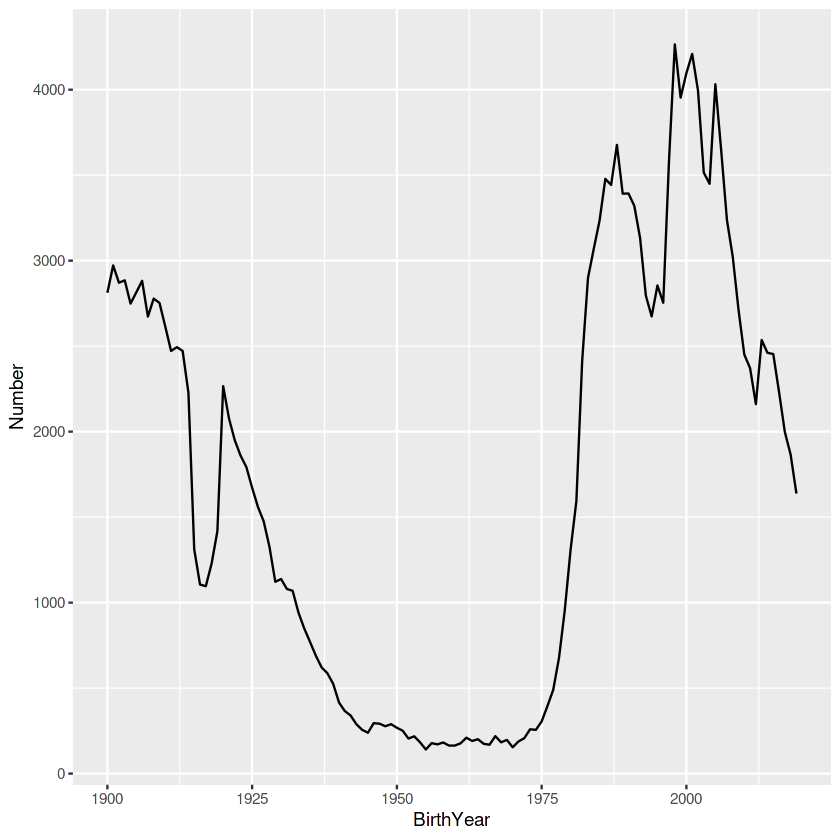

In [6]:
ggplot(data=dist_names, aes(x=BirthYear, y=Number)) + geom_line()

The name Lucie has been popular both in the beginning of the 20th and the 21st centuries with a minimal popularity reached in the fifties and sixties of the 20th century.

Similarly, We can also analyze a masculine name like Michael.

In [7]:
michael <- filter(FirstNames, FirstName =="MICHAEL")
michael <- michael %>%
            group_by(BirthYear)%>%
            summarize(Number = sum(Number))

`summarise()` ungrouping output (override with `.groups` argument)



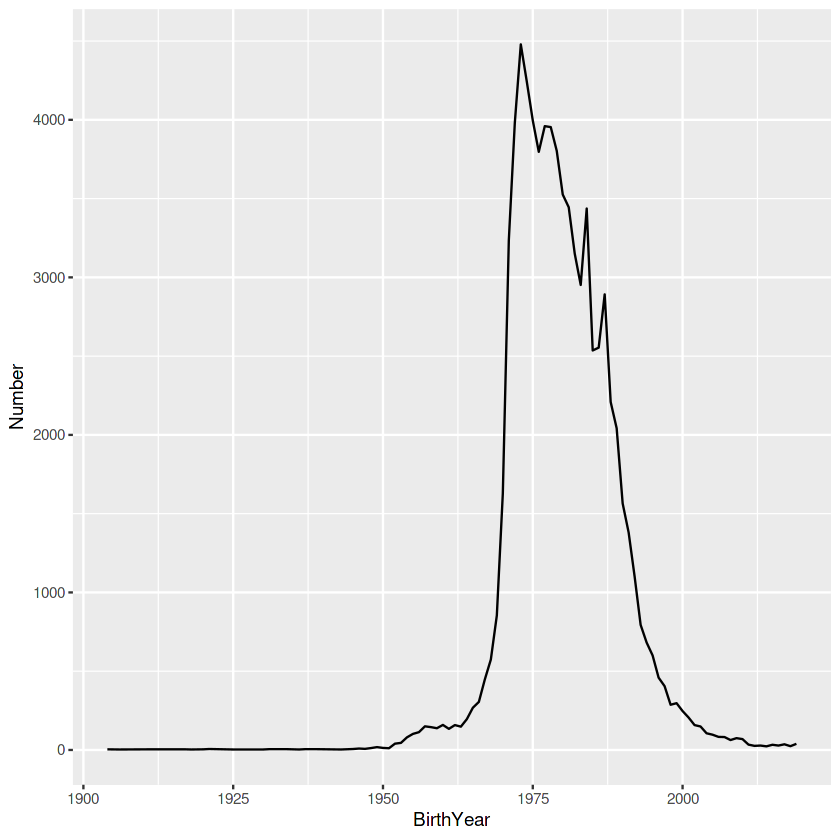

In [8]:
ggplot(data=michael, aes(x=BirthYear, y=Number)) + geom_line()

It has noticeably been very popular in the sixties and seventies but has drastically declined in popularity in the eighties and up to now.

We will now compare multiple names. 

In [9]:
comparison <- filter(FirstNames, FirstName=="MICHAEL"|FirstName=="LUCIE"|FirstName=="MARY"|FirstName=="JOE")
comparison <- comparison %>%
            group_by(BirthYear, FirstName)%>%
            summarize(Number = sum(Number))

`summarise()` regrouping output by 'BirthYear' (override with `.groups` argument)



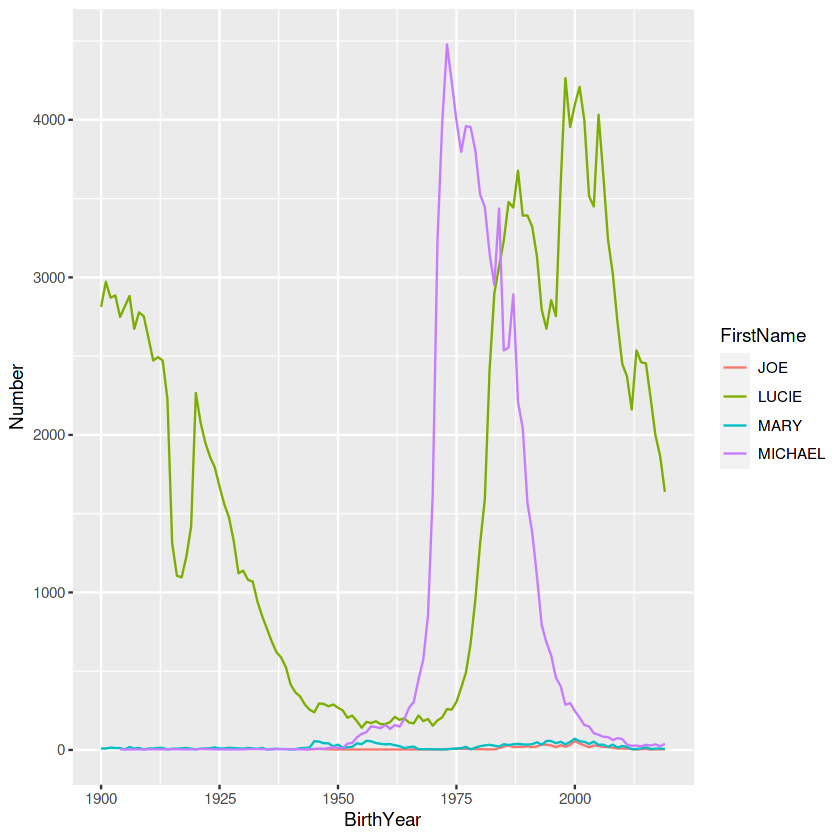

In [10]:
ggplot(data=comparison, aes(x=BirthYear, y=Number, color=FirstName)) + geom_line()

## Second question : Most given firstname by gender


We will analyze the most given first names per gender using the following code :

In [11]:
givenFirstM <- filter(FirstNames, Gender==1)
givenFirstM <-givenFirstM %>%
            group_by(BirthYear, FirstName)%>%
            summarize(Number = sum(Number))%>%
            group_by(BirthYear)
givenFirstM <- givenFirstM %>% top_n(1, Number)

`summarise()` regrouping output by 'BirthYear' (override with `.groups` argument)



In [12]:
head(givenFirstM)
tail(givenFirstM)

BirthYear,FirstName,Number
<dbl>,<chr>,<dbl>
1900,JEAN,14097
1901,JEAN,15632
1902,JEAN,16362
1903,JEAN,16533
1904,JEAN,16943
1905,JEAN,17997


BirthYear,FirstName,Number
<dbl>,<chr>,<dbl>
2014,LUCAS,5471
2015,GABRIEL,5646
2016,GABRIEL,5871
2017,GABRIEL,5437
2018,GABRIEL,5421
2019,GABRIEL,4986


In [13]:
givenFirstF <- filter(FirstNames, Gender==2)
givenFirstF <-givenFirstF %>%
            group_by(BirthYear, FirstName)%>%
            summarize(Number = sum(Number))%>%
            group_by(BirthYear)
givenFirstF <- givenFirstF %>% top_n(1, Number)

`summarise()` regrouping output by 'BirthYear' (override with `.groups` argument)



In [14]:
head(givenFirstF)

BirthYear,FirstName,Number
<dbl>,<chr>,<dbl>
1900,MARIE,48713
1901,MARIE,52149
1902,MARIE,51857
1903,MARIE,50425
1904,MARIE,50131
1905,MARIE,48981


In [15]:
tail(givenFirstF)

BirthYear,FirstName,Number
<dbl>,<chr>,<dbl>
2014,JADE,4691
2015,LOUISE,4543
2016,EMMA,4718
2017,EMMA,4811
2018,EMMA,4367
2019,EMMA,3943


Given the results, we notice that Jean and Marie were the most popular names in the beginning of the 20th century, and Emma and Lucas in the 21st so Let's see how both opposites have evolved throughout time.

`summarise()` regrouping output by 'BirthYear' (override with `.groups` argument)



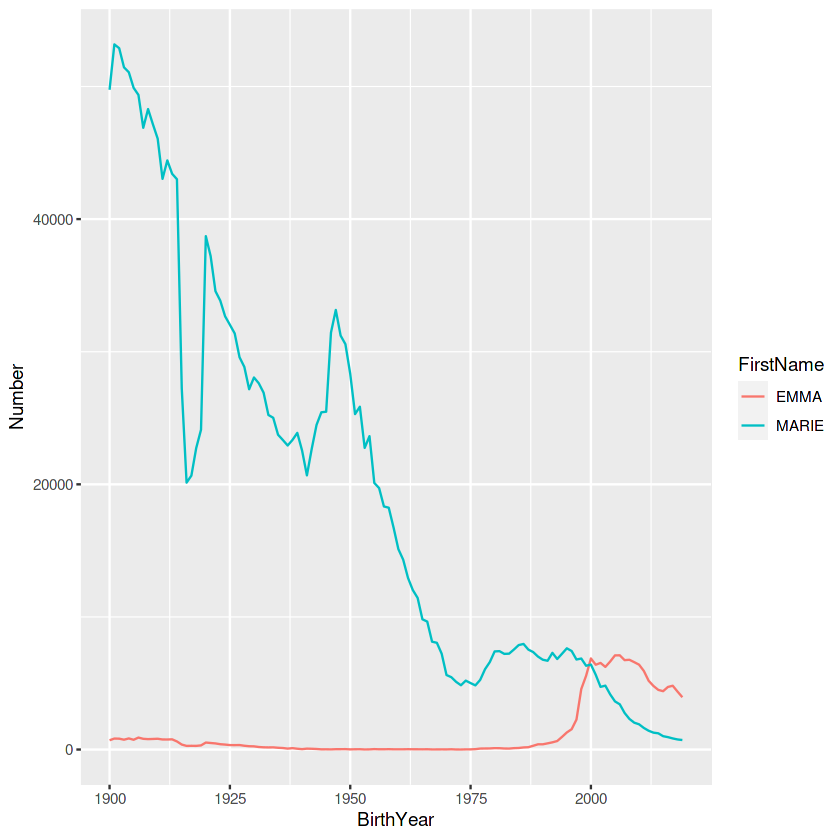

In [16]:
dist_names <- filter(FirstNames, FirstName =="MARIE"|FirstName=="EMMA")
dist_names <- dist_names %>%
            group_by(BirthYear, FirstName)%>%
            summarize(Number = sum(Number))
ggplot(data=dist_names, aes(x=BirthYear, y=Number, color=FirstName)) + geom_line()

`summarise()` regrouping output by 'BirthYear' (override with `.groups` argument)



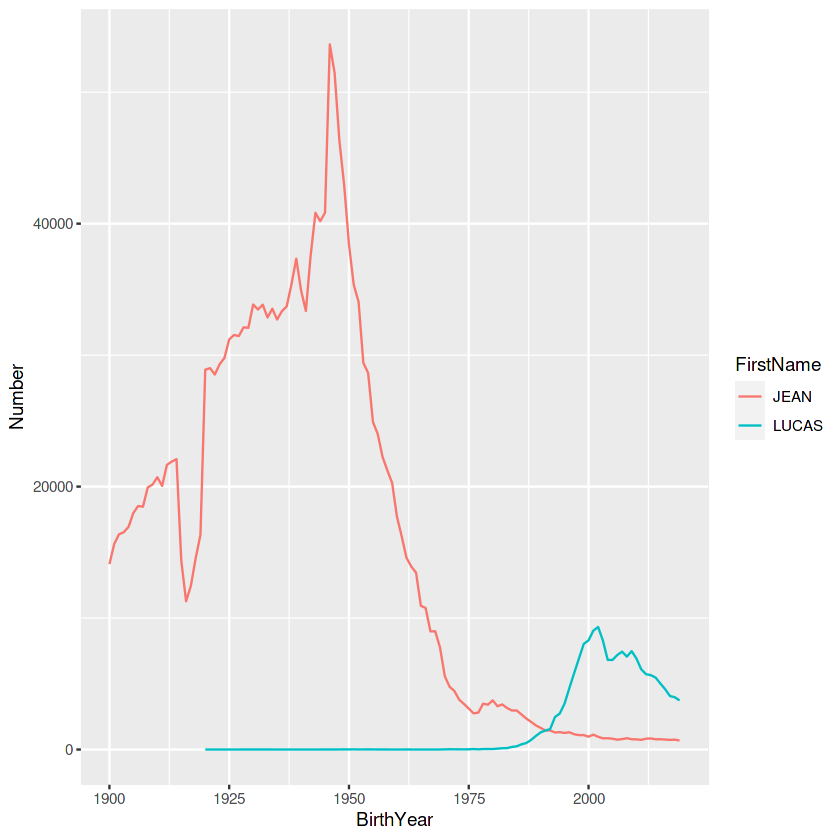

In [17]:
dist_names <- filter(FirstNames, FirstName =="JEAN"|FirstName=="LUCAS")
dist_names <- dist_names %>%
            group_by(BirthYear, FirstName)%>%
            summarize(Number = sum(Number))
ggplot(data=dist_names, aes(x=BirthYear, y=Number, color=FirstName)) + geom_line()